## 1a.
### Problems addressed by a Classification Decision Tree
- **Binary Classification:** Problems with only two possible outcomes (yes/no, success/failure)
- **Multi-class Classification:** Problems with more than two possible outcomes (e.g., predicting categories like A, B, or C).
- **Categorical Data Handling:** Problems where features or labels are non-numerical.

### Examples of Real-World Application
- **Medical Diagnosis:** Determine whether a patient has a disease based on symptoms, test results, and medical history. For example, predicting if a patient has diabetes (Yes/No) based several health factors.
- **Spam Email Detection:** Classify emails as spam or not spam based on their content. For example, analyzing email text, sender address, and frequency of certain keywords.
- **Fraud Detection:** Detect fraudulent transactions in financial systems. For example, classifying credit card transactions as fraudulent or legitimate based on transaction amount, location, and user patterns.

## 1b. Key Differences Between Classification Decision Tree and Multiple Linear Regression
### Classification Decision Tree
- Designed for `classification` tasks where the outcome is `categorical`.
- Outcomes are `discrete labels` (e.g., yes/no, multi-class categories).
- Uses `decision rules` and thresholds to split the data into homogeneous subsets and assigns the majority class.
- Splits the dataset recursively based on measures to reduce classification error.
- Decisions are interpretable as a set of conditional if-then rules.
- Handles categorical and numerical data directly without transformation.
- Works well with non-linear and complex relationships without explicit mathematical modeling.

### Multiple Linear Regression
- Designed for `regression` tasks where the outcome is `continuous` and `numerical`.
- Predicts a c`ontinuous numerical value` (e.g., house price, temperature).
- Uses a `linear equation` that combines input features with learned coefficients to make predictions.
- Finds the best-fit line by minimizing the `sum of squared errors` (least squares method).
- Predictions depend on the linear relationship between predictors and the target variable.
- Requires numerical predictors; categorical features need encoding (e.g., one-hot encoding).
- Assumes a `linear relationship` between predictors and the target variable.

## 2. Real-World Applications of Each Metrics
### Accuracy
- **Definition:** Measures the proportion of correct predictions (both true positives and true negatives) among all predictions.
- **Application:** A weather prediction system correctly forecasts sunny vs. rainy days. Accuracy is effective because both "sunny" and "rainy" days occur in roughly equal proportions.

### Sensitivity
- **Definition:** Measures the proportion of actual positives that are correctly identified.
- **Application:** A medical screening test for a serious disease like cancer. High sensitivity ensures that most people with cancer are flagged, reducing the risk of missed diagnoses (false negatives).

### Specificity
- **Definition:** Measures the proportion of actual negatives that are correctly identified.
- **Application:** A fraud detection system in banking. High specificity ensures legitimate transactions are not wrongly flagged as fraudulent, avoiding inconvenience to customers.

### Precision
- **Definition:** Measures the proportion of positive identifications that are actually correct.
- **Application:** A spam email filter. High precision ensures emails classified as spam are indeed spam, minimizing the risk of important emails being mistakenly marked as spam (false positives).

## Summary
**Link:** https://chatgpt.com/share/673f468c-ba04-8012-9b9a-2670c423ecaf

1. **Classification Decision Trees**: 
   - We discussed how classification decision trees work, including their structure (root, internal nodes, branches, and leaf nodes) and process (splitting data, decision rules, and predicting outcomes). 
   - Real-world applications were provided, such as medical diagnosis, customer churn prediction, and fraud detection.

2. **Comparison with Multiple Linear Regression**:
   - We compared how classification decision trees make predictions versus how multiple linear regression works. 
   - Decision trees predict categorical labels using decision rules, while linear regression predicts continuous numerical values using a linear equation.

3. **Metrics for Evaluating Models**:
   - We explored key evaluation metrics:
     - **Accuracy**: Useful for balanced datasets.
     - **Sensitivity**: Important for detecting positives (e.g., medical tests).
     - **Specificity**: Critical for avoiding false positives (e.g., fraud detection).
     - **Precision**: Ensures reliable positive predictions (e.g., spam filters).
   - Examples were provided for each metric's usefulness.

## 3.

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
ab_reduced_noNaN = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1)
ab_reduced_noNaN = ab_reduced_noNaN.dropna()
ab_reduced_noNaN = ab_reduced_noNaN.astype({'Pub year': int, 'NumPages': int, 'Hard_or_Paper': 'category'})
ab_reduced_noNaN.describe()

,List Price,Amazon Price,NumPages,Pub year,Thick
count,319.000000,319.000000,319.000000,319.000000,319.000000
mean,18.362978,12.941034,334.272727,2002.175549,0.903448
std,13.976755,12.436673,161.601510,10.646133,0.365261
min,1.500000,0.770000,24.000000,1936.000000,0.100000
25%,13.890000,8.600000,208.000000,1998.000000,0.600000
50%,15.000000,10.200000,320.000000,2005.000000,0.900000
75%,19.360000,12.560000,416.000000,2010.000000,1.100000
max,139.950000,139.950000,896.000000,2011.000000,2.100000


## 4. 

In [2]:
np.random.seed(42)
ab_reduced_noNaN_train = ab_reduced_noNaN.sample(frac=0.8)
ab_reduced_noNaN_test = ab_reduced_noNaN.drop(ab_reduced_noNaN_train.index)

print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Testing set size: {len(ab_reduced_noNaN_test)}")

Training set size: 255
Testing set size: 64


In [3]:
y = pd.get_dummies(ab_reduced_noNaN['Hard_or_Paper'])['H']
X = ab_reduced_noNaN[['List Price']]

These codes prepare the data for fitting the DecisionTreeClassifier model by separating the features (𝑋) and the target variable (𝑦):

**y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']**<br>
This line converts `Hard_or_Paper` categorical variable into dummy/indicator variables (binary columns for each category). In this case, it creates one column for each possible value of Hard_or_Paper (e.g., 'H' for hardcover and possibly others like 'P' for paperback). The ['H'] selects the dummy column corresponding to 'H' (Hardcover), resulting in a binary series where 1 represents a hardcover book and 0 represents other types of books (e.g., paperback). This binary series is the target variable (𝑦) for classification.

**X = ab_reduced_noNaN[['List Price']]**<br>
`[['List Price']]` selects the List Price column from the dataset as the feature for the model. Double brackets ([[]]) ensure that X is a DataFrame, which is the required format for scikit-learn models, rather than a Series. This column contains the feature(s) used by the model to predict whether a book is a hardcover.

/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'Source.gv.pdf'


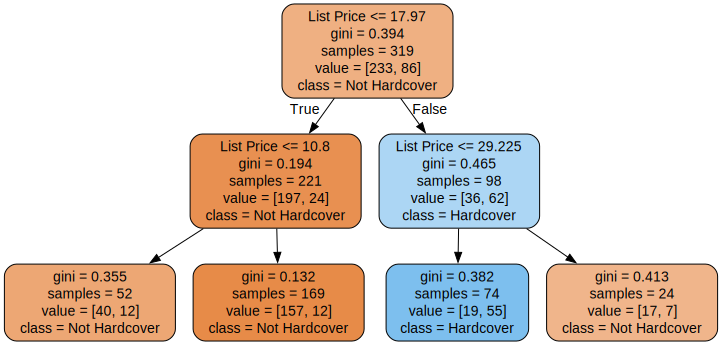

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

dot_data = tree.export_graphviz(
    clf, 
    out_file=None, 
    feature_names=['List Price'], 
    class_names=['Not Hardcover', 'Hardcover'], 
    filled=True, 
    rounded=True
)
graph = graphviz.Source(dot_data)

graph.render(view=True)
graph

First, the decision tree has a condition that act as a threshold, which is List Price <= 17.97 in its root node. From here, those below this threshold will be categorized as `Not Hardcover` and those above this threshold will be categorized as `Hardcover`. This will be repeated until the leaf node and we get 197 books are categorized as `Not Hardcover` in the left branch and 24 books are categorized as `Hardcover`, while in the right branch, there are 26 books categorized as `Hardcover` and 72 books categorized as `Not Hardcover`.

## Summary
**Link:** https://chatgpt.com/share/673f513b-92d4-8012-8be6-db1bf7fa5e3f

1. **Decision Tree Modeling**:
   - You are working with a dataset (`amazonbooks.csv`) to train a `DecisionTreeClassifier` using the `List Price` feature to predict whether a book is a **hardcover** or **paperback** (`Hard_or_Paper`).
   - You started by loading and preparing the dataset, handling missing values, and converting relevant columns into proper data types.
   - You then split the dataset into training and testing sets (80/20 split).

2. **Creating and Visualizing the Decision Tree**:
   - You fitted the decision tree model (`clf`) using only the `List Price` feature and predicted the class (`Hard_or_Paper`).
   - We discussed using `tree.plot_tree(clf)` and `export_graphviz` for visualizing the decision tree.
   - You encountered an issue with opening the PDF output from `graph.view()` in your environment (related to missing tools for opening PDFs).
   - I suggested alternative ways to save the decision tree visualization and view it manually or in Jupyter Notebook.

3. **Understanding the Decision Tree Output**:
   - You asked for an explanation of what the decision tree predictions mean based on the `List Price`.
   - I explained how the decision tree splits the `List Price` feature and makes predictions by showing the threshold (e.g., `List Price <= 20`) and predicting whether the book is **hardcover** or **paperback** based on that condition.
   - We discussed what values like `[186, 69]` in a node of the decision tree mean. These values represent the distribution of samples in that node, with the first number (186) being the count of books predicted as **Not Hardcover** (paperback) and the second number (69) being the count of books predicted as **Hardcover**.

4. **Jupyter Notebook Adjustments**:
   - You asked how to display the decision tree within a Jupyter Notebook, and I provided a solution to render the tree inline using `graphviz` and `plot_tree`.

5. **General Explanation**:
   - Throughout the conversation, I explained the functioning of the decision tree, the meaning of the node values, and how the model uses the `List Price` feature to classify books into the two categories based on the training data.

## 5.

/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'Source.gv.pdf'


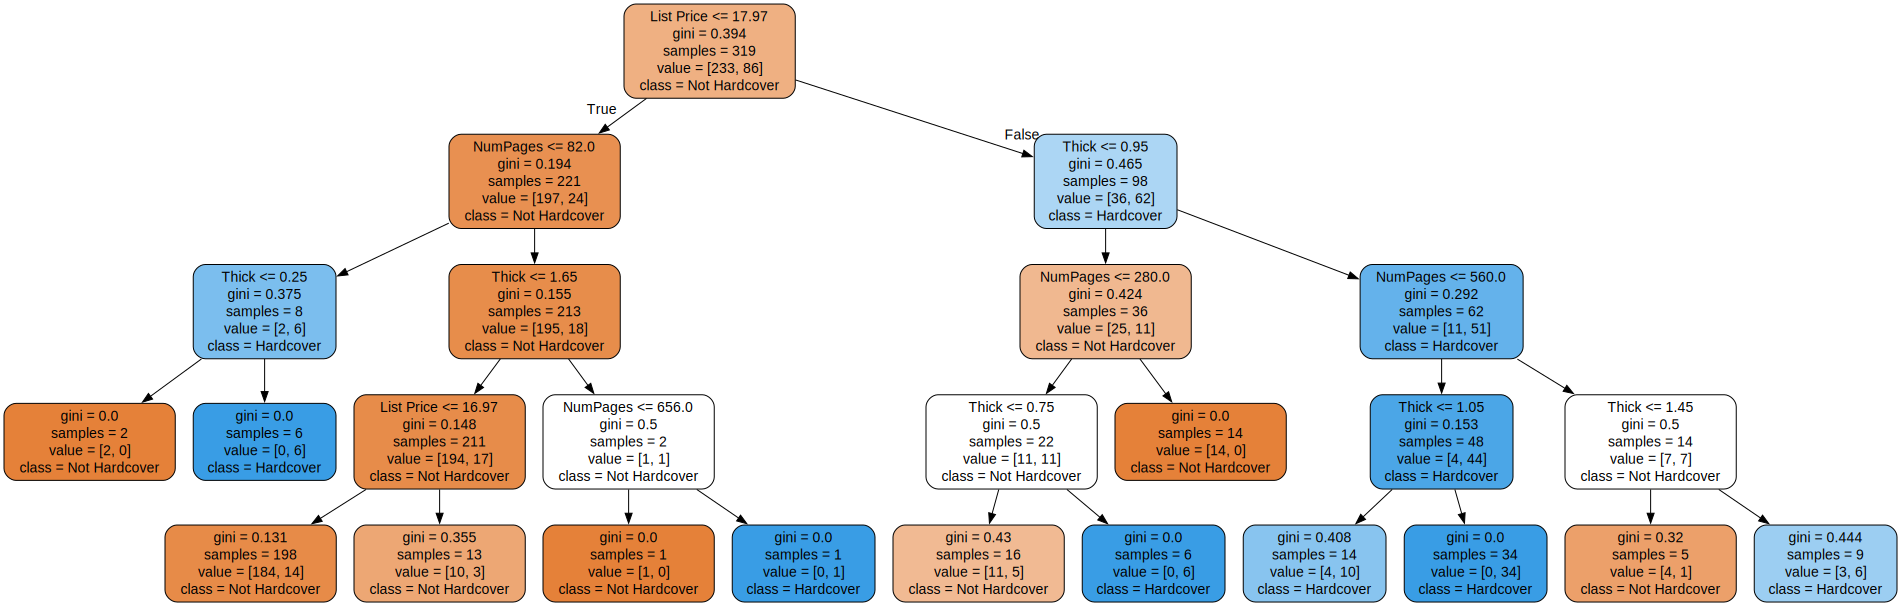

In [5]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz as gv
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
ab_reduced_noNaN = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1)
ab_reduced_noNaN = ab_reduced_noNaN.dropna()
ab_reduced_noNaN = ab_reduced_noNaN.astype({'Pub year': int, 'NumPages': int, 'Hard_or_Paper': 'category'})

y = pd.get_dummies(ab_reduced_noNaN['Hard_or_Paper'])['H']
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

dot_data = tree.export_graphviz(
    clf2, 
    out_file=None, 
    feature_names=['NumPages', 'Thick', 'List Price'], 
    class_names=['Not Hardcover', 'Hardcover'], 
    filled=True, 
    rounded=True
)
graph = gv.Source(dot_data)

graph.render(view=True)
graph

`clf2` model uses 3 different inputs: `NumPages`, `Thick`, and `List Price` to predict whether or not a book is hardcover. Then, using a decision tree, we find patterns in the data and create decision rules that map input features to the class labels ('Not Hardcover' or 'Hardcover'). Once the decision tree is trained, it can predict whether a new book is a hardcover or not.

## 6.

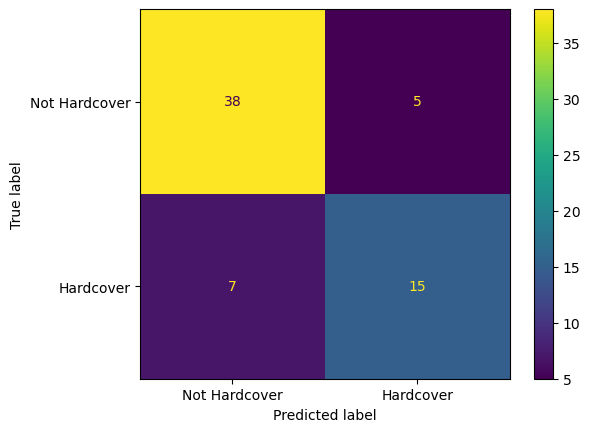

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Recall
ab_reduced_noNaN_train = ab.sample(frac=0.8)
ab_reduced_noNaN_test = ab.drop(ab_reduced_noNaN_train.index)

# For clf model
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X_train = ab_reduced_noNaN_train[['List Price']]

y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']
X_test = ab_reduced_noNaN_test[['List Price']]

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=['Not Hardcover', 'Hardcover']).plot()

In [7]:
TN, FP, FN, TP = conf_matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Accuracy: 0.8154
Sensitivity (Recall): 0.6818
Specificity: 0.8837


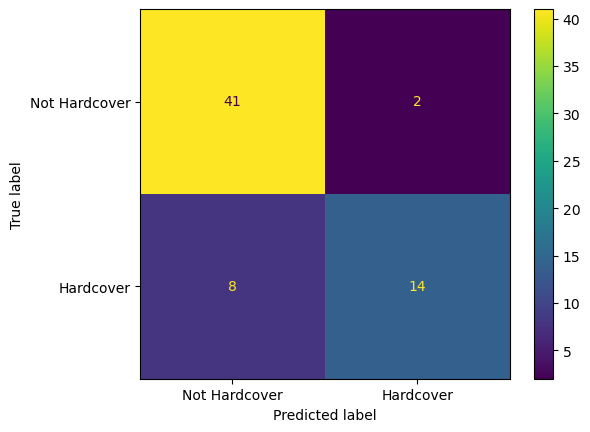

In [10]:
# For clf2 model
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X_train = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]

y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=['Not Hardcover', 'Hardcover']).plot()

In [11]:
TN, FP, FN, TP = conf_matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Accuracy: 0.8462
Sensitivity (Recall): 0.6364
Specificity: 0.9535


## Summary
**Link:** https://chatgpt.com/share/673f56ad-b95c-8012-a06a-10594174a3ff

1. **Data and Decision Tree Model**:
   - You imported and processed a dataset (`amazonbooks.csv`) containing information about books, including attributes like `NumPages`, `Thick`, `List Price`, and `Hard_or_Paper` (whether a book is hardcover or not).
   - You built a decision tree model (`clf2`) using `NumPages`, `Thick`, and `List Price` as input features to predict whether a book is hardcover or not.
   - We explained how the decision tree makes predictions by following rules based on these input features to classify books as "Hardcover" or "Not Hardcover."

2. **Training and Evaluation**:
   - You performed a train-test split (80% training, 20% testing) and created a new decision tree model (`clf`) using `List Price` to predict whether a book is hardcover.
   - You used the `confusion_matrix` to evaluate the model's performance on the test set, leading to the calculation of **accuracy**, **sensitivity**, and **specificity**.

3. **Metrics Calculation**:
   - We discussed how to calculate the **accuracy**, **sensitivity** (recall), and **specificity** from the confusion matrix. These metrics are key to understanding the performance of the classification model:
     - **Accuracy**: The proportion of correct predictions.
     - **Sensitivity**: The model's ability to correctly identify positive cases (Hardcover).
     - **Specificity**: The model's ability to correctly identify negative cases (Not Hardcover).

## 7.
The main reason causing the difference between two confusion matrices stated is that in the first confusion matrix, the input is only `List Price`. Meanwhile, in the second confusion matrix, there are 3 inputs, which are `NumPages`, `Thick`, `List Price`. This difference in input will result in better accuracy 

The confusion matrices for `clf` and `clf2` are better due to:
- **Target Variable Encoding (One-Hot Encoding):** This ensures that the target variable is binary, with the value for "Hardcover" (represented by 'H') and "Not Hardcover" (implicitly represented by 0).
- **Balanced Target Distribution:** By extracting the "H" column for one-hot encoding, your target variable is converted to a binary representation (either 0 or 1). This can make the confusion matrix look more balanced and easier to interpret, especially if the model predicts well for the binary target.
- **Model Simplicity (Low Max Depth):** The decision tree classifier is set with a low `max_depth=2` and `max_depth=4`, which simplifies the model. A simpler model may sometimes generalize better, leading to more accurate predictions, especially when there are fewer features and the data isn't overly complex. This can result in fewer misclassifications, hence a "better" confusion matrix.
- **Evaluation of Binary Classifier:** In binary classification, metrics such as accuracy, precision, recall, and F1-score are more straightforward to interpret when the model is focused on predicting one class (in this case, "Hardcover") in a well-balanced way. The model might be correctly identifying a higher proportion of the relevant class (i.e., "Hardcover"), which is reflected in the confusion matrix with fewer false positives or false negatives.

## Summary
**Link:** https://chatgpt.com/share/673f5b7c-76c4-8012-b3d8-a0ca864900a4

1. **Confusion Matrix Differences:**
   - You were comparing two confusion matrices. The difference stemmed from the number of features used in the prediction:
     - The first matrix used **only "List Price"** as a feature.
     - The second matrix used **three features**: "NumPages", "Thick", and "List Price".
   - The differences were due to how the model's prediction accuracy changes with more input features, which impacts the confusion matrix.

2. **Confusion Matrix in Code:**
   - You shared code using a decision tree classifier to predict whether a book is a "Hardcover" (represented as "H") or not, using only the `"List Price"` feature. 
   - The confusion matrix was evaluated using one-hot encoding on the target variable (`"Hard_or_Paper"`), specifically focusing on the "Hardcover" class.
   - This matrix appeared "better" likely because:
     - The model used a simple decision tree (`max_depth=2`), which could generalize well without overfitting.
     - The target variable was encoded in binary, making the prediction task clearer.
     - The model used a single, potentially strong feature ("List Price"), which could lead to more accurate classifications.

## 8.

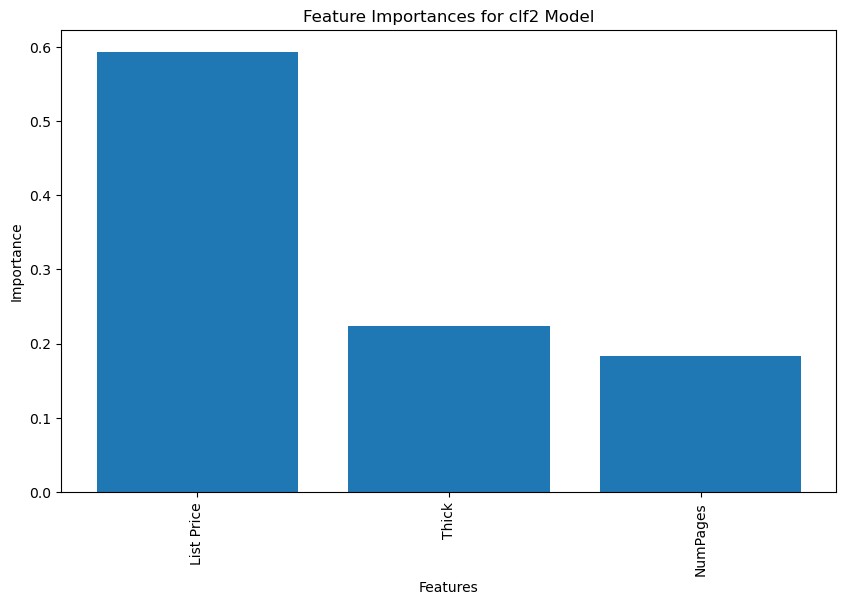

The most important feature is 'List Price' with an importance score of 0.5928


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

importances = clf2.feature_importances_

feature_names = clf2.feature_names_in_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances for clf2 Model")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Reporting the most important feature
most_important_feature = feature_names[indices[0]]
most_important_importance = importances[indices[0]]

print(f"The most important feature is '{most_important_feature}' with an importance score of {most_important_importance:.4f}")

## 9.
In linear regression, the coefficients represent the magnitude and direction of the relationship between each feature and the target variable, where a larger coefficient indicates a greater impact, and the sign indicates whether the relationship is positive or negative. In decision trees, feature importances reflect how much each feature contributes to reducing uncertainty (or improving splits) in the tree's decision-making process, with higher importance indicating a greater role in the tree's predictions. While coefficients in linear regression are continuous values, feature importances in decision trees are relative scores that indicate a feature's contribution to the model's performance.

## Summary
**Link:** https://chatgpt.com/share/673f60a4-23d8-8012-a22d-4c74a51194e3

In this conversation, you learned how to visualize feature importances in decision trees using scikit-learn by accessing the `feature_importances_` attribute and plotting them with `matplotlib`. You also learned how to use the `feature_names_in_` attribute to report the most important predictor variable in a decision tree model (`clf2`). Lastly, we discussed the difference between interpreting coefficients in linear regression and feature importances in decision trees, highlighting how coefficients represent the relationship between features and the target variable, while feature importances reflect a feature's contribution to the decision-making process of a tree.

## 10. Yes